In [71]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

from catboost import CatBoostClassifier

In [28]:
df = pd.read_csv('../data/processed/val.csv')df = pd.read_csv('../data/processed/val.csv')

In [29]:
df.head()

,User,Card,Year,Month,Day,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?,Hour,Minute,Date,Day of Week
0,1888,0,2017,1,21,61.00,Chip Transaction,-1288082279022882052,Berkeley Heights,NJ,7922.0,5499,NaN,0,10,16,2017-01-21,Сб
1,1608,2,2017,1,21,61.78,Chip Transaction,4989409516453337564,Prairie Village,KS,66208.0,5300,NaN,0,10,16,2017-01-21,Сб
2,26,0,2017,1,21,11.11,Chip Transaction,2027553650310142703,Virginia Beach,VA,23455.0,5541,NaN,0,10,16,2017-01-21,Сб
3,490,2,2017,1,21,8.86,Swipe Transaction,50639245984060890,Pompano Beach,FL,33060.0,5411,NaN,0,10,16,2017-01-21,Сб
4,272,3,2017,1,21,19.92,Chip Transaction,-4752064311331295725,Elk Grove,CA,95758.0,4214,NaN,0,10,17,2017-01-21,Сб


In [30]:
df.columns

Index(['User', 'Card', 'Year', 'Month', 'Day', 'Amount', 'Use Chip',
       'Merchant Name', 'Merchant City', 'Merchant State', 'Zip', 'MCC',
       'Errors?', 'Is Fraud?', 'Hour', 'Minute', 'Date', 'Day of Week'],
      dtype='object')

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348970 entries, 0 to 3348969
Data columns (total 18 columns):
 #   Column          Dtype  
---  ------          -----  
 0   User            int64  
 1   Card            int64  
 2   Year            int64  
 3   Month           int64  
 4   Day             int64  
 5   Amount          float64
 6   Use Chip        object 
 7   Merchant Name   int64  
 8   Merchant City   object 
 9   Merchant State  object 
 10  Zip             float64
 11  MCC             int64  
 12  Errors?         object 
 13  Is Fraud?       int64  
 14  Hour            int64  
 15  Minute          int64  
 16  Date            object 
 17  Day of Week     object 
dtypes: float64(2), int64(10), object(6)
memory usage: 459.9+ MB


In [44]:
cat_features = ['User', 'Card', 'Use Chip',
                'Merchant Name', 'Merchant City', 'MCC',
                'Hour', 'Day of Week']
num_features = ['Amount']
target = 'Is Fraud?'

In [45]:
df.Amount = df.Amount.astype('float')
df.User = df.User.astype('object')
df.Card = df.Card.astype('object')
df['Merchant Name'] = df['Merchant Name'].astype('object')
df.Zip = df.Zip.astype('object')
df.MCC = df.MCC.astype('object')
df.Hour = df.Hour.astype('object')

In [47]:
y = df[target]

In [48]:
X = df[cat_features + num_features]

In [49]:
X.isna().sum()

User             0
Card             0
Use Chip         0
Merchant Name    0
Merchant City    0
MCC              0
Hour             0
Day of Week      0
Amount           0
dtype: int64

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

In [52]:
from catboost import CatBoostClassifier

In [54]:
clf = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1
)

clf.fit(X_train, y_train,
       cat_features=cat_features,
       eval_set=(X_val, y_val),
       verbose=5)

0:	learn: 0.5984490	test: 0.5984552	best: 0.5984552 (0)	total: 196ms	remaining: 19.4s
5:	learn: 0.3146988	test: 0.3147343	best: 0.3147343 (5)	total: 628ms	remaining: 9.84s
10:	learn: 0.1787471	test: 0.1788054	best: 0.1788054 (10)	total: 1.21s	remaining: 9.76s
15:	learn: 0.1055363	test: 0.1056165	best: 0.1056165 (15)	total: 1.55s	remaining: 8.14s
20:	learn: 0.0640529	test: 0.0641534	best: 0.0641534 (20)	total: 1.86s	remaining: 7.01s
25:	learn: 0.0384941	test: 0.0385203	best: 0.0385203 (25)	total: 2.37s	remaining: 6.76s
30:	learn: 0.0232856	test: 0.0232780	best: 0.0232780 (30)	total: 3.07s	remaining: 6.84s
35:	learn: 0.0143129	test: 0.0142883	best: 0.0142883 (35)	total: 3.78s	remaining: 6.72s
40:	learn: 0.0089225	test: 0.0088956	best: 0.0088956 (40)	total: 4.48s	remaining: 6.45s
45:	learn: 0.0056797	test: 0.0056508	best: 0.0056508 (45)	total: 5.16s	remaining: 6.06s
50:	learn: 0.0037302	test: 0.0037005	best: 0.0037005 (50)	total: 5.9s	remaining: 5.67s
55:	learn: 0.0025561	test: 0.0025234	

In [55]:
df_test = pd.read_csv('../data/processed/test.csv')

In [56]:
y_test = df_test[target]

In [57]:
X_test = df_test[cat_features + num_features]

In [61]:
preds = clf.predict(data=X_test)

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

In [65]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1721851
           1       0.85      0.94      0.89      2087

    accuracy                           1.00   1723938
   macro avg       0.92      0.97      0.95   1723938
weighted avg       1.00      1.00      1.00   1723938



In [66]:
print(confusion_matrix(y_test, preds))

[[1721496     355]
 [    118    1969]]


In [67]:
from sklearn.metrics import ConfusionMatrixDisplay

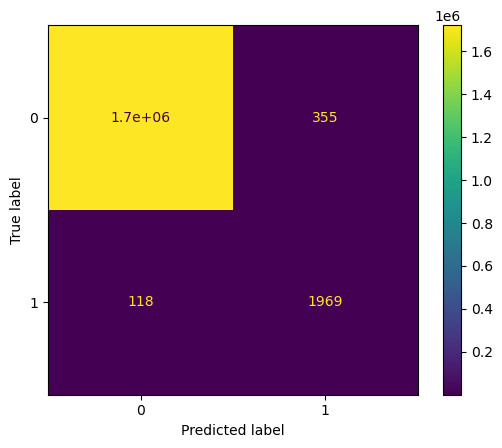

In [72]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds))
disp.plot()
plt.show()

In [87]:
X_test['Fraud'] = y_test

/var/folders/4k/mwht33nx1y3874hyv4dvd6x00000gn/T/ipykernel_7167/2607284807.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['Fraud'] = y_test


In [90]:
X_test[(X_test.Fraud == 1) & (X_test.Prediction == 1)].Amount.sum()

160169.75

In [91]:
X_test[(X_test.Fraud == 1)].Amount.sum()

165754.86

In [93]:
## Dealing with imbalanced classes

In [94]:
clf2 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    auto_class_weights='Balanced'
)

clf2.fit(X_train, y_train,
       cat_features=cat_features,
       eval_set=(X_val, y_val),
       verbose=5)

0:	learn: 0.6070994	test: 0.6066060	best: 0.6066060 (0)	total: 297ms	remaining: 29.4s
5:	learn: 0.3552831	test: 0.3516511	best: 0.3516511 (5)	total: 923ms	remaining: 14.5s
10:	learn: 0.2303576	test: 0.2258084	best: 0.2258084 (10)	total: 1.54s	remaining: 12.5s
15:	learn: 0.1647393	test: 0.1599316	best: 0.1599316 (15)	total: 2.14s	remaining: 11.3s
20:	learn: 0.1143719	test: 0.1122591	best: 0.1122591 (20)	total: 2.84s	remaining: 10.7s
25:	learn: 0.0872219	test: 0.0862086	best: 0.0862086 (25)	total: 3.52s	remaining: 10s
30:	learn: 0.0717701	test: 0.0717308	best: 0.0717308 (30)	total: 4.27s	remaining: 9.51s
35:	learn: 0.0605523	test: 0.0530054	best: 0.0530054 (35)	total: 4.94s	remaining: 8.78s
40:	learn: 0.0539769	test: 0.0475722	best: 0.0475722 (40)	total: 5.61s	remaining: 8.08s
45:	learn: 0.0478240	test: 0.0426005	best: 0.0426005 (45)	total: 6.37s	remaining: 7.48s
50:	learn: 0.0436561	test: 0.0393330	best: 0.0393330 (50)	total: 7.04s	remaining: 6.76s
55:	learn: 0.0414151	test: 0.0377466	b

In [95]:
preds2 = clf2.predict(data=X_test)

In [96]:
print(classification_report(y_test, preds2))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00   1721851
           1       0.12      1.00      0.21      2087

    accuracy                           0.99   1723938
   macro avg       0.56      1.00      0.60   1723938
weighted avg       1.00      0.99      0.99   1723938



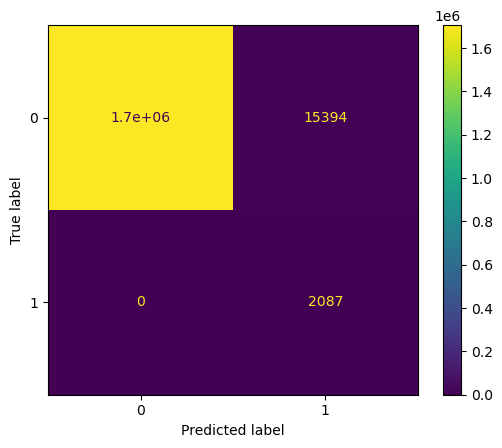

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds2))
disp.plot()
plt.show()

In [98]:
clf3 = CatBoostClassifier(
    iterations=100,
    learning_rate=0.1,
    auto_class_weights='SqrtBalanced'
)

clf3.fit(X_train, y_train,
       cat_features=cat_features,
       eval_set=(X_val, y_val),
       verbose=5)

0:	learn: 0.6079267	test: 0.6081116	best: 0.6081116 (0)	total: 257ms	remaining: 25.4s
5:	learn: 0.3362484	test: 0.3366039	best: 0.3366039 (5)	total: 825ms	remaining: 12.9s
10:	learn: 0.1909648	test: 0.1909251	best: 0.1909251 (10)	total: 1.45s	remaining: 11.7s
15:	learn: 0.1140746	test: 0.1138350	best: 0.1138350 (15)	total: 2s	remaining: 10.5s
20:	learn: 0.0708890	test: 0.0705109	best: 0.0705109 (20)	total: 2.54s	remaining: 9.57s
25:	learn: 0.0459651	test: 0.0454927	best: 0.0454927 (25)	total: 3.22s	remaining: 9.17s
30:	learn: 0.0313242	test: 0.0308536	best: 0.0308536 (30)	total: 3.94s	remaining: 8.76s
35:	learn: 0.0225444	test: 0.0221166	best: 0.0221166 (35)	total: 4.65s	remaining: 8.27s
40:	learn: 0.0168383	test: 0.0166940	best: 0.0166940 (40)	total: 5.41s	remaining: 7.79s
45:	learn: 0.0137451	test: 0.0136616	best: 0.0136616 (45)	total: 6.22s	remaining: 7.3s
50:	learn: 0.0116408	test: 0.0117244	best: 0.0117244 (50)	total: 6.95s	remaining: 6.67s
55:	learn: 0.0102972	test: 0.0101792	bes

In [99]:
preds3 = clf3.predict(data=X_test)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1721851
           1       0.71      1.00      0.83      2087

    accuracy                           1.00   1723938
   macro avg       0.86      1.00      0.92   1723938
weighted avg       1.00      1.00      1.00   1723938



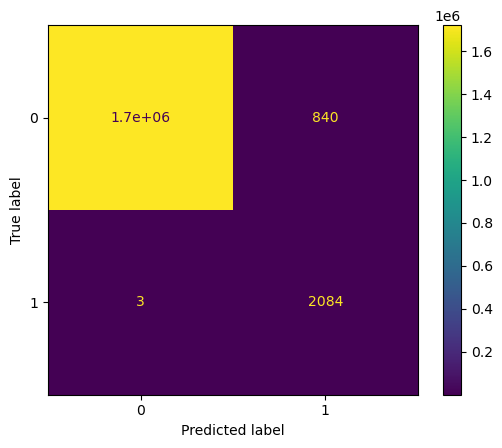

In [100]:
print(classification_report(y_test, preds3))
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test, preds3))
disp.plot()
plt.show()

In [101]:
X_test.Prediction = preds3
X_test[(X_test.Fraud == 1) & (X_test.Prediction == 1)].Amount.sum()

/var/folders/4k/mwht33nx1y3874hyv4dvd6x00000gn/T/ipykernel_7167/3955559077.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test.Prediction = preds3


165954.37

In [102]:
X_test[(X_test.Fraud == 1)].Amount.sum()

165754.86